# TODO:
- Intro to PLA
- Simulate a dataset and build a PLA model on it

# Introduction to PLA: 
## It works for Classification problem of linear seperable dataset 

## Model:
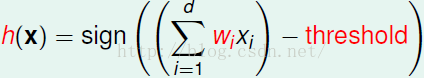

## Update:
IF y = 1, but prediction is "-1":
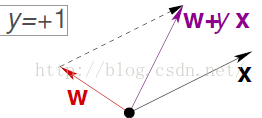

IF y = -1, but prediction is "1":
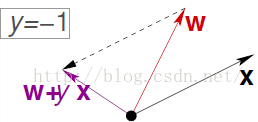

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def gen_point():
        x = random.uniform(-1, 1)
        y = random.uniform(-1, 1)
        return x, y

In [3]:
class Dataset:    
    def __init__(self, num_points):
        p0 = gen_point()
        p1 = gen_point()
        slope = (p1[1] - p0[1]) / (p1[0] - p0[0])
        intercept = p0[1] - slope*p0[0]
        self.line = (slope, intercept)
        self.num_points = num_points
        
        self.points = {}
        for i in range(num_points):
            p = gen_point()
            if p[0]*self.line[0] + self.line[1] > p[1]:
                self.points[p] = 1
            else:
                self.points[p] = -1
            
        self.label = ['red' if self.points[p] == 1 else 'blue' for p in self.points]
    
    def plot(self):
        plt.scatter([p[0] for p in self.points], [p[1] for p in self.points], c=self.label)
        plt.plot((-1, 1), (-self.line[0]+self.line[1], self.line[0]+self.line[1]))
        plt.xlim([-1, 1])
        plt.ylim([-1, 1])
        plt.title('target function')
        plt.gca().set_aspect(1) # set the proportion of height/width
        plt.show()
        

In [4]:
class PLA:   
    def __init__(self, ds):
        self.w1 = 0
        self.w2 = 0.1
        self.threshold = 0.1
        self.points = ds.points
        self.label = ds.label      
        self.pred = {}     
        self.mis_p = []
        self.num_points = ds.num_points
    
    def plot(self):
        plt.scatter([p[0] for p in self.pred], [p[1] for p in self.pred], c=self.label)
        plt.plot((-1, 1), (self.w1/self.w2-self.threshold/self.w2, -self.w1/self.w2 \
                           -self.threshold/self.w2))
        plt.xlim([-1, 1])
        plt.ylim([-1, 1])
        plt.title('hypothesis accuracy: {}'.format(round(1-len(self.mis_p)/self.num_points,\
                                                         1)))
        plt.gca().set_aspect(1) # set the proportion of height/width
        plt.show()

    def update_weights(self, draw = False):
        num_itr = 0
        while True:
            for p in self.points:
                self.pred[p] = int(np.sign(self.w1*p[0] + self.w2*p[1] + self.threshold))
            for p in self.pred:
                if(self.pred[p] != self.points[p]):
                    self.mis_p.append(p)
            
            if len(self.mis_p) == 0:
                
                if draw:
                    self.plot()

                return num_itr
            
            else:
                num_itr += 1
                
                if draw:
                    self.plot()
                
                p = random.choice(self.mis_p)
                self.w1 = self.w1 + self.points[p]*p[0]
                self.w2 = self.w2 + self.points[p]*p[1]
                self.threshold = self.threshold + self.points[p]
                self.mis_p = []
                

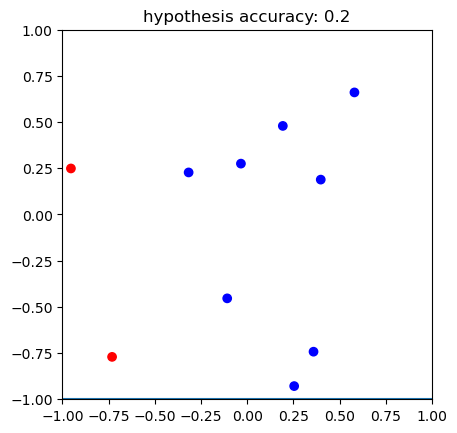

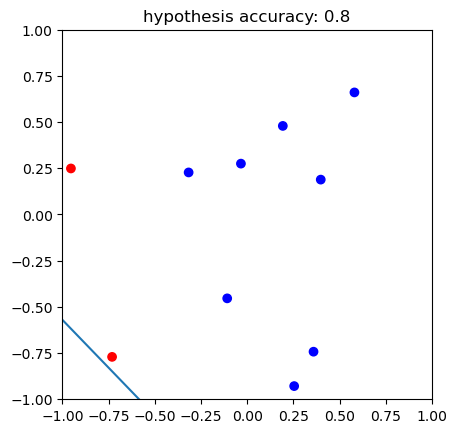

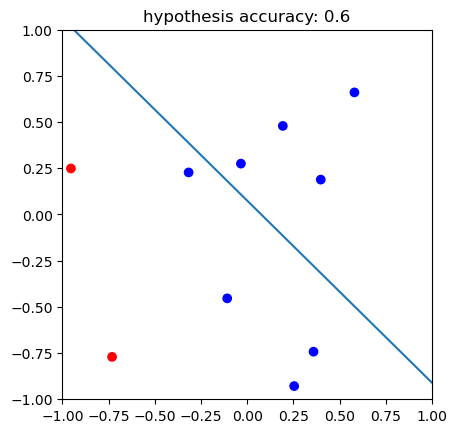

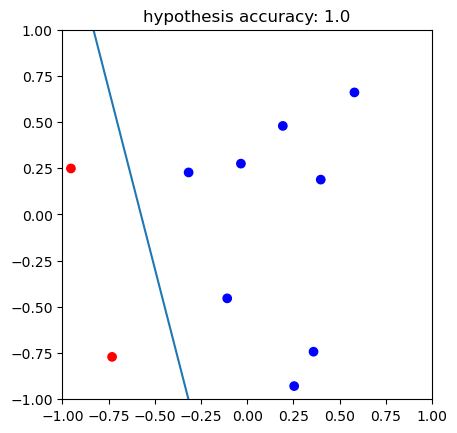

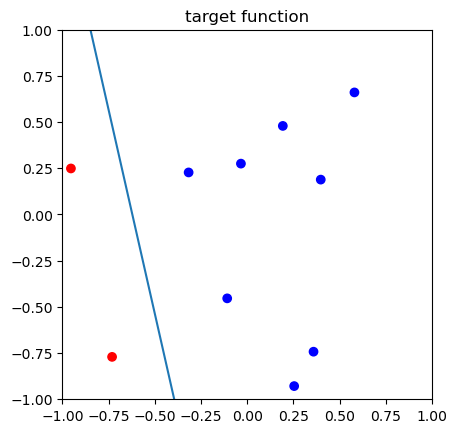

In [5]:
ds = Dataset(num_points=10)

pla = PLA(ds)
pla.update_weights(True)

ds.plot()


In [6]:
sim_times = 100

total_ite = 0
for i in range(sim_times): 
    ds = Dataset(num_points=10)
    pla = PLA(ds)
    total_ite += pla.update_weights()

print("average iteration times:{}".format(total_ite / sim_times))

average iteration times:8.74


## Reference:
- CSDN: Percetron Learning Algorithm
- Learn from data Lecture 2

## Summary:
- when initialize weights, the value zero should be avoided
- when update weights, pay attention to the constant
- it cost me so much time to put the code into the dataset class and pla class, I still need to pratice writing class

## Future work:
- change PLA model a little bit to fit unlinear-seperable data
- continue lecture 3 and 4 in learn from data